In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy import stats
import statsmodels.graphics.gofplots as sm
from statsmodels.stats.diagnostic import lilliefors

In [112]:
#Učitavanje podataka:
train = pd.read_csv('train.csv')
train.head()
price = train['SalePrice']
price
train.shape
#train je datoteka sa svim varijablama 
#price je varijabla SalePrice, zavisna varijabla

(1460, 81)

In [113]:
train.shape

(1460, 81)

In [114]:
train.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [115]:
train.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [116]:
1-train.count().sum()/train.size

0.0588956536445121

In [117]:
#plt.figure(figsize=(7,7))
#n, bins, patches = plt.hist(price, bins=100, histtype = 'bar', color='fuchsia', stacked=True)
#plt.xlabel('Sale Price')
#plt.ylabel('Frequency')
#plt.show()

# HISTOGRAM ZA SALEPRICE, LOG(SALEPRICE) I BOXCOX(SALEPRICE):

C:\Users\Josipa\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


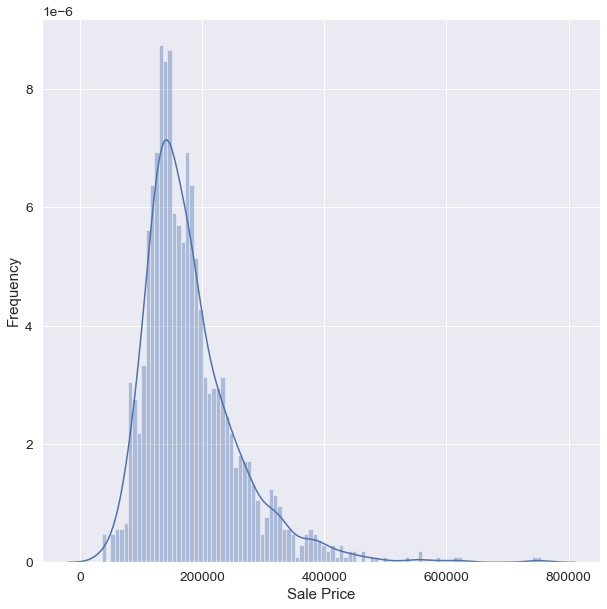

In [118]:
#Histogram SalePrice:
plt.figure(figsize=(10,10))
sns.distplot(price, bins=100, color='b')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.show(block=False)


In [119]:
#Karakteristična petorka za SalePrice:
price.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [120]:
#Logaritmirani SalePrice:
log_price=np.log(price)

C:\Users\Josipa\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


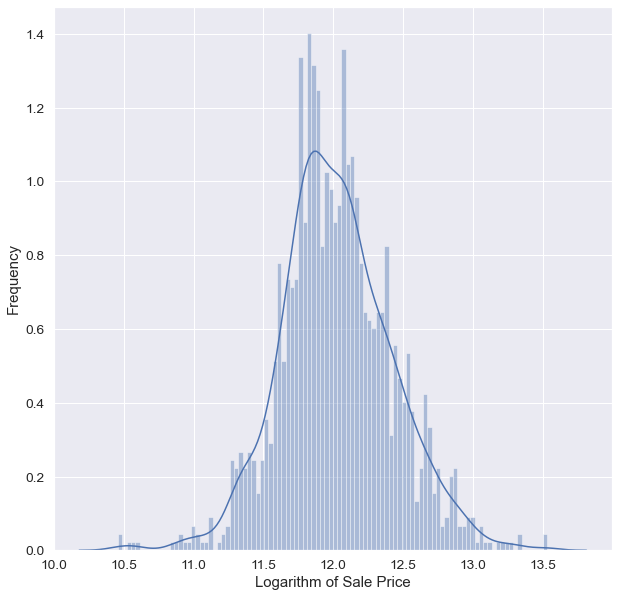

In [121]:
#Histogram za logPrice:
train['LogPrice']=np.log(price)
plt.figure(figsize=(10,10))
sns.distplot(np.log(price), bins=100, color='b')
plt.xlabel('Logarithm of Sale Price')
plt.ylabel('Frequency')
plt.show(block=False)

In [122]:
#Karakteristična petorka za logPrice:
log_price.describe()

count    1460.000000
mean       12.024051
std         0.399452
min        10.460242
25%        11.775097
50%        12.001505
75%        12.273731
max        13.534473
Name: SalePrice, dtype: float64

C:\Users\Josipa\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


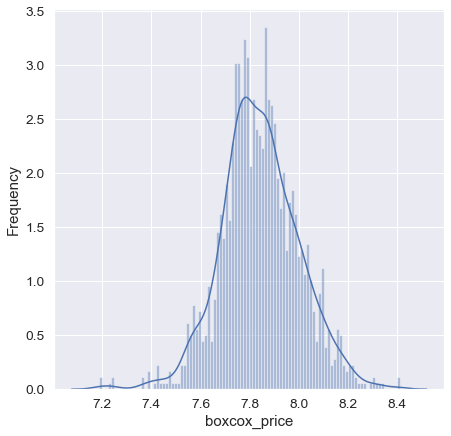

In [123]:
#Histogram za Boxcox od Pricea:
plt.figure(figsize=(7,7))
boxcox_price, boxcox_lambda = stats.boxcox(price)
sns.distplot(boxcox_price, bins=100)
plt.xlabel('boxcox_price')
plt.ylabel('Frequency')
train['boxcox']=boxcox_price
plt.show()

In [124]:
boxcox_lambda

-0.07692391328663316

# NORMALNI VJEROJATNOSNI GRAF ZA SALEPRICE, LOG(SALEPRICE) I BOXCOX(SALEPRICE):

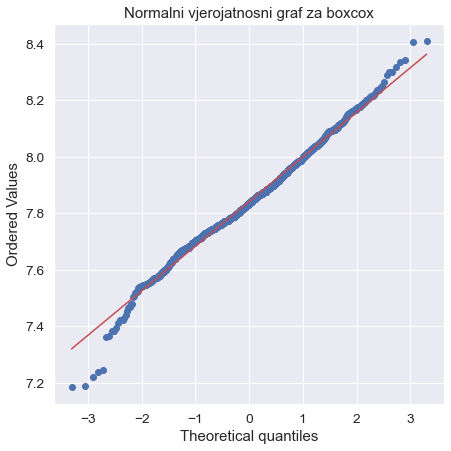

In [125]:
#Normalni vjerojatnosni graf za Boxcox od Pricea:
plt.figure(figsize=(7,7))
stats.probplot(boxcox_price, plot=plt)
plt.title('Normalni vjerojatnosni graf za boxcox')
plt.show()

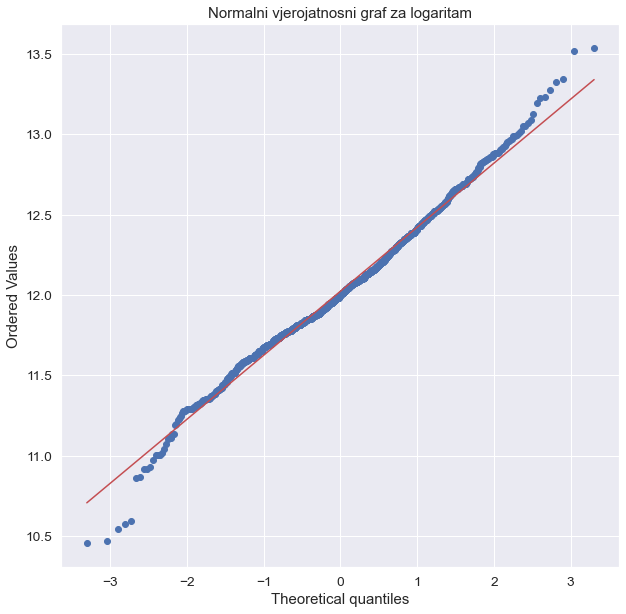

In [126]:
#Normalni vjerojatnosni graf za logPrice:
plt.figure(figsize=(10,10))
stats.probplot(np.log(price), plot=plt)
plt.title('Normalni vjerojatnosni graf za logaritam')
plt.show()

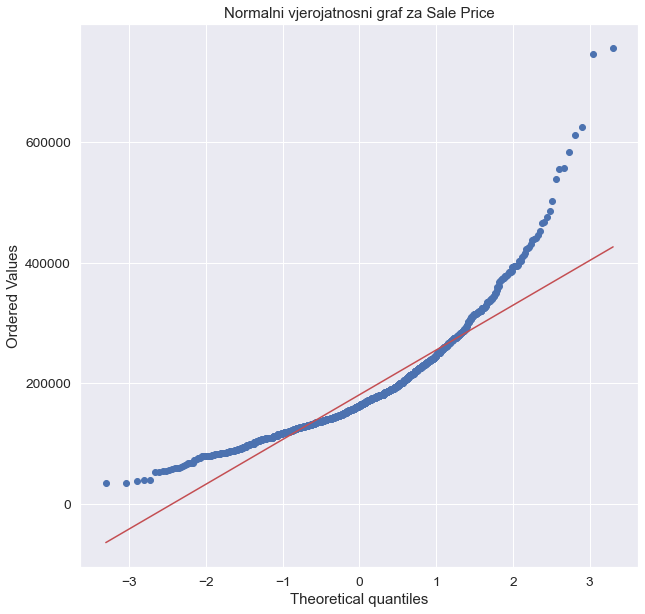

In [127]:
#Normalni vjerojatnosni graf za SalePrice:
plt.figure(figsize=(10,10))
stats.probplot(price, plot=plt)
plt.title('Normalni vjerojatnosni graf za Sale Price')
plt.show()

In [128]:
lilliefors(boxcox_price)[1]

0.0009999999999998899

In [129]:
print('p='+str(round(lilliefors(price)[1], 100)))

p=0.0009999999999998899


In [130]:
print('p='+str(round(lilliefors(np.log(price))[1], 100)))

p=0.0009999999999998899


In [131]:
lilliefors(np.log(price))[1]

0.0009999999999998899

# HISTOGRAMI ZA NEZAVISNE VARIJABLE (KOVARIJATE):

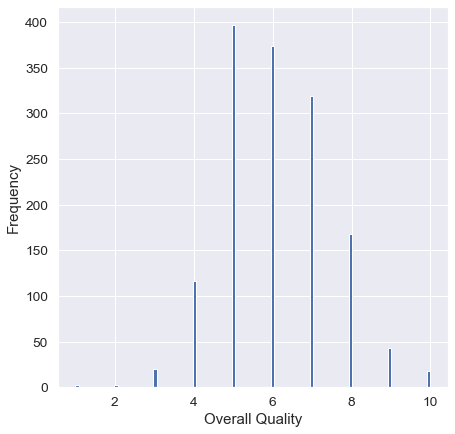

mean: 6.0993150684931505


In [132]:
#Histogram OverAllQuality:
plt.figure(figsize=(7,7))
plt.hist(train['OverallQual'], bins=100)
plt.xlabel('Overall Quality')
plt.ylabel('Frequency')
plt.show(block=False)
a=5
b=np.mean(train['OverallQual'])
print(f'mean: {b}')

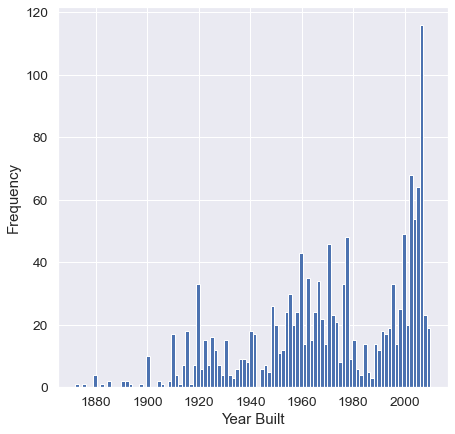

In [133]:
#Histogram YearBuilt:
plt.figure(figsize=(7,7))
plt.hist(train['YearBuilt'], bins=100)
plt.xlabel('Year Built')
plt.ylabel('Frequency')
plt.show(block=False)


In [134]:
train.describe().iloc[:,1:10]
#kako je izabrao bas ove varijable/stupce?


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000


In [135]:
#Min, 25%, 50%, 75%, max kvantili za YearBuilt:
np.quantile(train['YearBuilt'], np.linspace(0,1,5))

array([1872., 1954., 1973., 2000., 2010.])

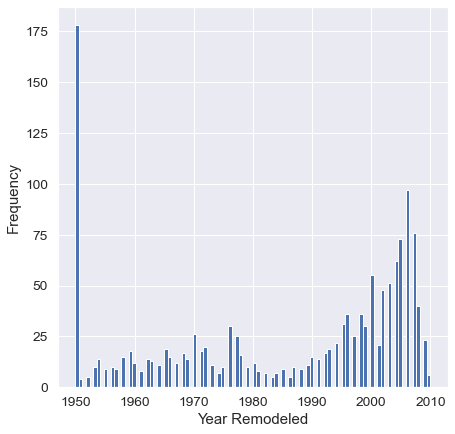

In [136]:
#Histogram Year Remodeled:
plt.figure(figsize=(7,7))
plt.hist(train['YearRemodAdd'], bins=100)
plt.xlabel('Year Remodeled')
plt.ylabel('Frequency')
plt.show(block=False)

In [137]:
#Min, 25%, 50%, 75%, max kvantili za YearRemodAdd
np.quantile(train['YearRemodAdd'], np.linspace(0,1,5))

array([1950., 1967., 1994., 2004., 2010.])

Uvodimo novu varijabllu WasRemodeled:

In [138]:
#Uvodimo novu varijablu WasRemodeled:
train['WasRemodeled']=np.multiply((train['YearRemodAdd']>=train['YearBuilt']+1),1)
train['WasRemodeled']
train[['YearRemodAdd', 'YearBuilt', 'WasRemodeled']].head() #samo par prvih mi pokazi kao primjer

,YearRemodAdd,YearBuilt,WasRemodeled
0,2003,2003,0
1,1976,1976,0
2,2002,2001,1
3,1970,1915,1
4,2000,2000,0


In [139]:
#Koliko ih je bilo preuređeno:
len(train[(train['WasRemodeled']==1)])

696

In [140]:
#Koliko ih je od sveukupnog u postotku bilo preuređeno:
train['WasRemodeled'].sum()/len(train)

0.4767123287671233

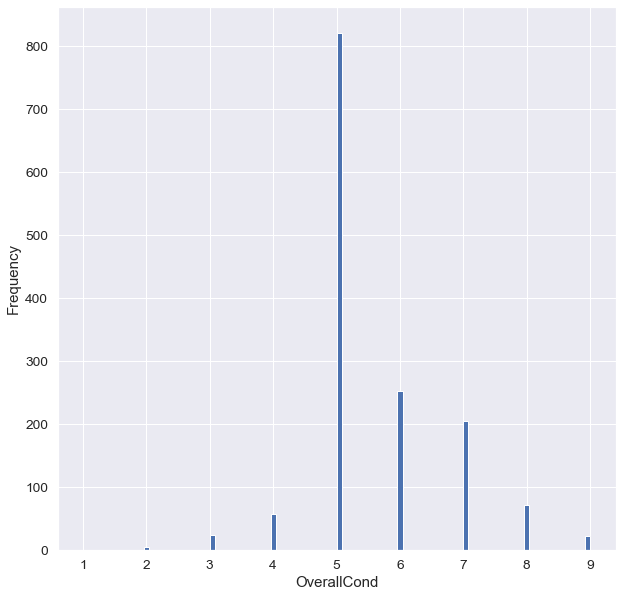

In [141]:
#Histogram OverAllCondition:
plt.figure(figsize=(10,10))
plt.hist(train['OverallCond'], bins=100)
plt.xlabel('OverallCond')
plt.ylabel('Frequency')
plt.show(block=False)

In [142]:
#Koeficijent korelacije za LogPrice i OverAllCondition je negativan: 
np.corrcoef(train['LogPrice'], train['OverallCond'])

array([[ 1.        , -0.03686799],
       [-0.03686799,  1.        ]])

In [143]:
#stats.describe(train['YearRemodAdd'])

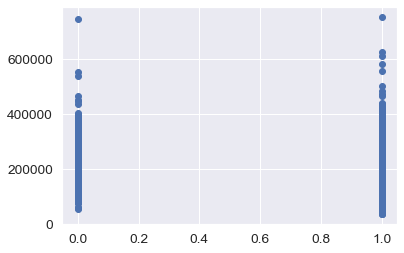

In [144]:
#Plot varijable WasRemodeled i SalePrice
plt.scatter(train['WasRemodeled'], train['SalePrice'])
#vece su cijene kuca koje nisu renovirane, nego koje jesu

Uvodimo novu varijablu HasBasement:

In [145]:
#Koliko kuća ima podrum:
train['HasBasement']=pd.notnull(train['BsmtQual'])
train['HasBasement'].sum()

1423

Uvodimo novu varijablu HasGarage:

In [146]:
#Koliko kuća ima garažu:
train['HasGarage']=pd.notnull(train['GarageType'])
train['HasGarage'].sum()

1379

# PLOTOVI ZA OUTLIERE:

In [147]:
categories = np.array([0, 2, 1, 1, 1, 2, 0, 0])
colormap = np.array(['r', 'g', 'b'])
colormap[categories]

array(['r', 'b', 'g', 'g', 'g', 'b', 'r', 'r'], dtype='<U1')

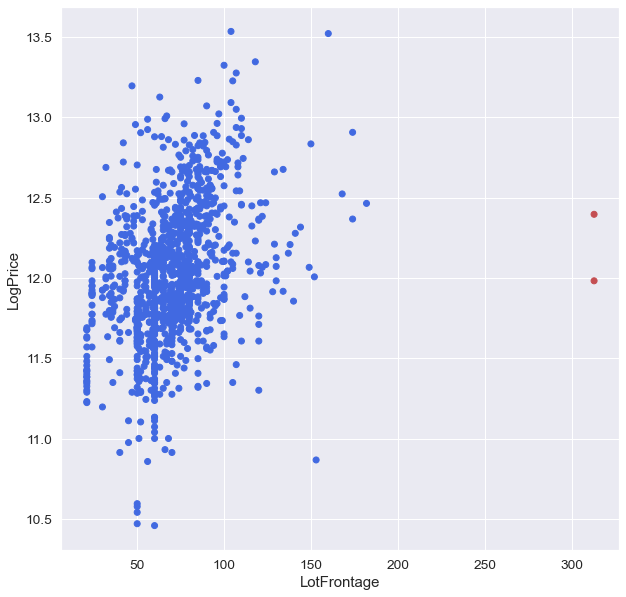

In [148]:
plt.figure(figsize=(10,10))
categories=np.multiply((train['LotFrontage']>250),1)
colormap=np.array(['royalblue', 'r'])
plt.scatter(train['LotFrontage'], train['LogPrice'], c=colormap[categories])
plt.xlabel('LotFrontage')
plt.ylabel('LogPrice')
plt.show()

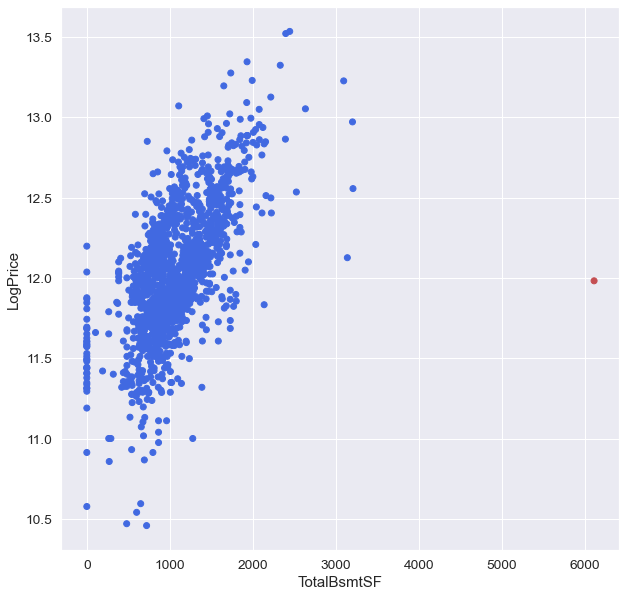

In [149]:
plt.figure(figsize=(10,10))
categories=np.multiply((train['TotalBsmtSF']>6000),1)
colormap=np.array(['royalblue', 'r'])
plt.scatter(train['TotalBsmtSF'], train['LogPrice'], c=colormap[categories])
plt.xlabel('TotalBsmtSF')
plt.ylabel('LogPrice')
plt.show()

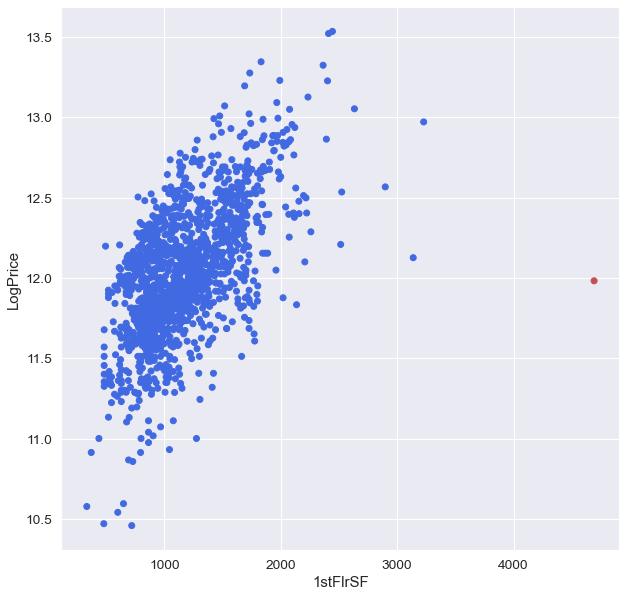

In [150]:
plt.figure(figsize=(10,10))
categories=np.multiply((train['1stFlrSF']>4000),1)
colormap=np.array(['royalblue', 'r'])
plt.scatter(train['1stFlrSF'], train['LogPrice'], c=colormap[categories])
plt.xlabel('1stFlrSF')
plt.ylabel('LogPrice')
plt.show()

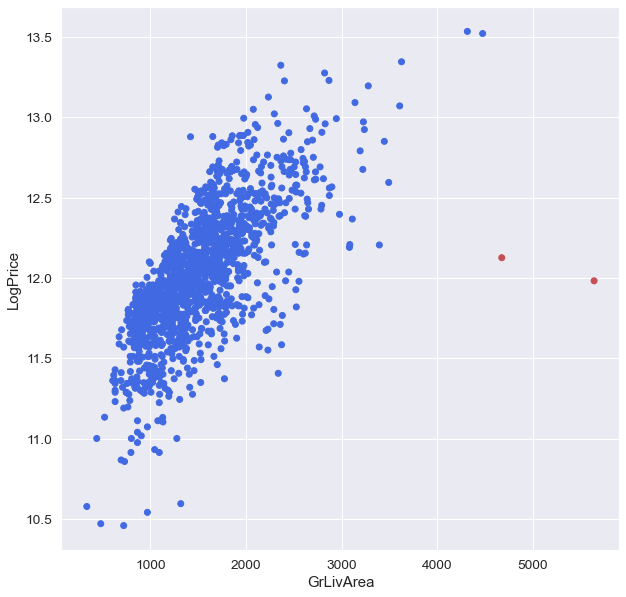

In [151]:
plt.figure(figsize=(10,10))
categories=np.multiply(np.logical_and((train['GrLivArea']>4000),(train['SalePrice'] < 300000)),1)
colormap=np.array(['royalblue', 'r'])
plt.scatter(train['GrLivArea'], train['LogPrice'], c=colormap[categories])
plt.xlabel('GrLivArea')
plt.ylabel('LogPrice')
plt.show()

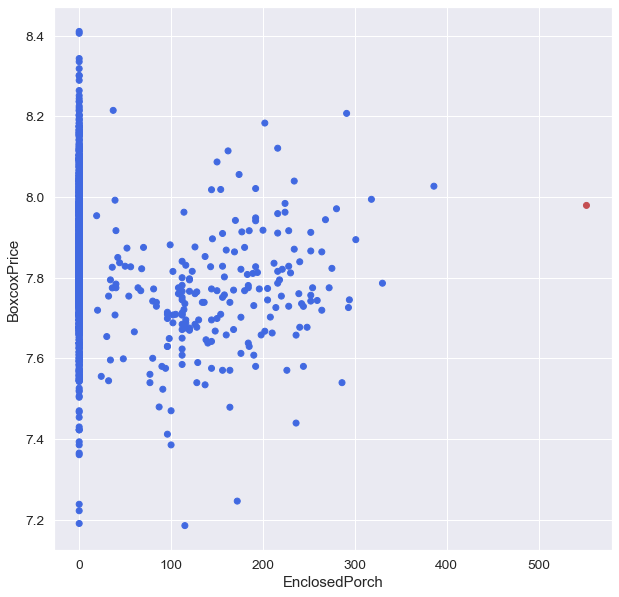

In [152]:
plt.figure(figsize=(10,10))
categories=np.multiply((train['EnclosedPorch']>500),1)
colormap=np.array(['royalblue', 'r'])
plt.scatter(train['EnclosedPorch'], train['boxcox'], c=colormap[categories])
plt.xlabel('EnclosedPorch')
plt.ylabel('BoxcoxPrice')
plt.show()

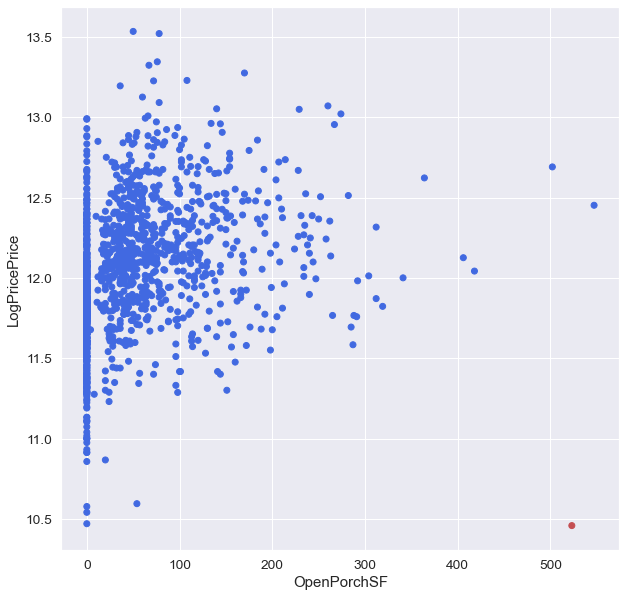

In [153]:
plt.figure(figsize=(10,10))
categories=np.multiply(np.logical_and((train['OpenPorchSF']>500),(train['boxcox']<7.8)),1)
colormap=np.array(['royalblue', 'r'])
plt.scatter(train['OpenPorchSF'], train['LogPrice'], c=colormap[categories])
plt.xlabel('OpenPorchSF')
plt.ylabel('LogPricePrice')
plt.show()

Izbacivanje outliera:

In [154]:
#Izbacujemo outliere:
train_out = train
train_out = train_out.drop(train_out[(train_out['LotFrontage'] > 250)].index)
train_out = train_out.drop(train_out[(train_out['BsmtFinSF1'] > 5000)].index)
train_out = train_out.drop(train_out[(train_out['TotalBsmtSF'] > 6000)].index)
train_out = train_out.drop(train_out[(train_out['1stFlrSF'] > 4000)].index)
train_out = train_out.drop(train_out[(train_out['GrLivArea'] > 4000) & (train_out['SalePrice'] < 300000)].index)
train_out = train_out.drop(train_out[(train_out['EnclosedPorch'] > 500)].index)
train_out = train_out.drop(train_out[(train_out['OpenPorchSF'] > 500) & (train_out['SalePrice'] < 10000)].index)

In [155]:
train_out.shape

(1456, 86)

In [156]:
#Printamo koji su to outlieri:
out=train[(train['GrLivArea'] > 4000) & (train['SalePrice'] < 300000) | (train['LotFrontage'] > 250) | (train['TotalBsmtSF'] > 6000) | (train['1stFlrSF'] > 4000)]
out.iloc[:,0:10]
#Kako samo 3?

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities
523,524,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub
934,935,20,RL,313.0,27650,Pave,NaN,IR2,HLS,AllPub
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub


In [157]:
out=train[(train['GrLivArea'] > 4000) & (train['SalePrice'] < 300000) | (train['LotFrontage'] > 250) | (train['TotalBsmtSF'] > 6000) | (train['1stFlrSF'] > 4000) | (train_out['BsmtFinSF1'] > 5000) | (train_out['EnclosedPorch'] > 500) | ((train_out['OpenPorchSF'] > 500) & (train_out['SalePrice'] < 10000))]
out.iloc[:,0:10]
#Zasto opet izbacuje 3 umisto 4?

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities
523,524,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub
934,935,20,RL,313.0,27650,Pave,NaN,IR2,HLS,AllPub
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub


In [158]:
#Sto ce nam ovo?
train.groupby('MiscFeature').mean()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,PoolArea,MiscVal,MoSold,YrSold,SalePrice,LogPrice,boxcox,WasRemodeled,HasBasement,HasGarage
MiscFeature,,,,,,,,,,,,,,,,,,,,,
Gar2,789.000000,55.000000,NaN,15831.000000,5.500000,6.5,1968.500000,1987.500000,0.500000,498.000000,...,0.0,11900.000000,6.000000,2007.000000,170750.000000,12.041560,7.851425,0.500000,1.000000,1.000000
Othr,790.000000,115.000000,65.000000,8872.000000,4.500000,6.0,1939.500000,1950.000000,0.000000,187.500000,...,0.0,1750.000000,8.000000,2009.500000,94000.000000,11.356596,7.569956,1.000000,0.500000,0.500000
Shed,621.387755,44.591837,71.305556,16338.428571,5.428571,6.0,1959.142857,1976.183673,58.346939,419.653061,...,0.0,697.836735,6.469388,2008.244898,151187.612245,11.868387,7.780729,0.510204,0.959184,0.959184
TenC,1387.000000,60.000000,80.000000,16692.000000,7.000000,5.0,1978.000000,1978.000000,184.000000,790.000000,...,519.0,2000.000000,7.000000,2006.000000,250000.000000,12.429216,8.002875,0.000000,1.000000,1.000000


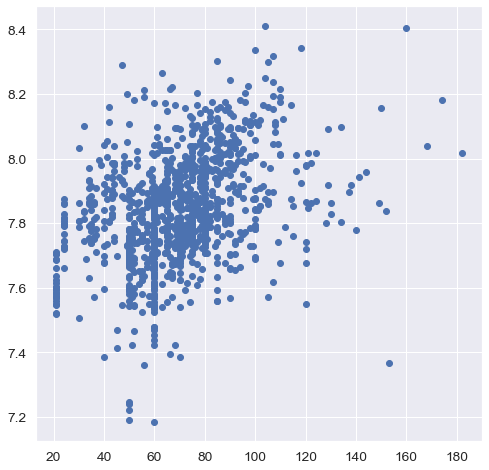

In [159]:
plt.figure(figsize=(8,8))
plt.scatter(train_out['LotFrontage'], train_out['boxcox'])
plt.show()

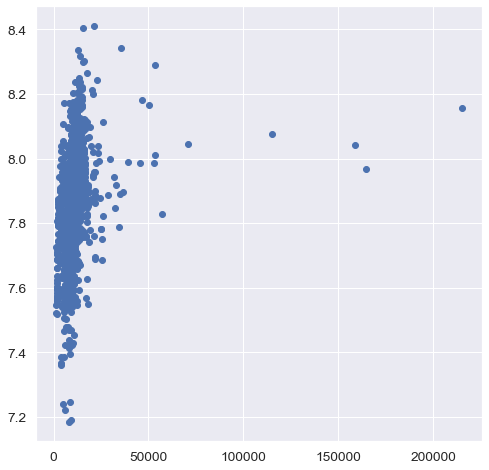

In [160]:
plt.figure(figsize=(8,8))
plt.scatter(train_out['LotArea'], train_out['boxcox'])
plt.show()

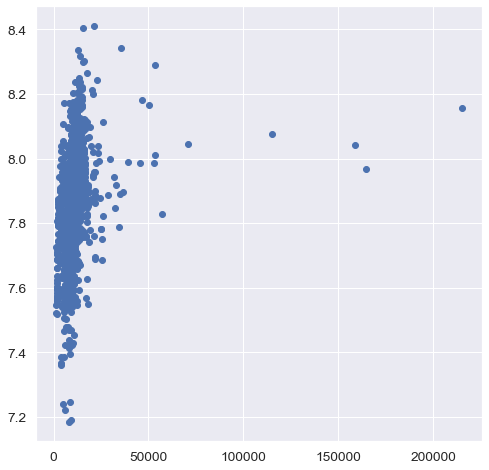

In [161]:
plt.figure(figsize=(8,8))
plt.scatter(train_out['LotArea'], train_out['boxcox'])
plt.show()

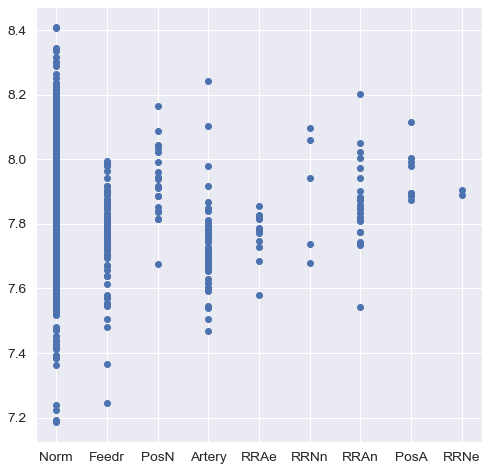

In [162]:
plt.figure(figsize=(8,8))
plt.scatter(train['Condition1'], boxcox_price)
plt.show()

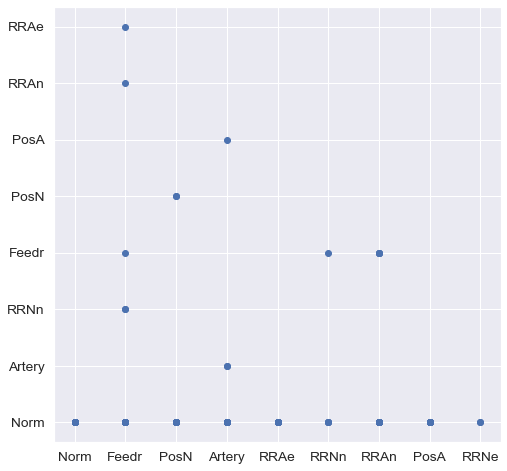

In [163]:
plt.figure(figsize=(8,8))
plt.scatter(train['Condition1'], train['Condition2'])
plt.show()

In [ ]:
plt.figure(figsize=(8,8))
plt.scatter(train_out['OverallCond'], train_out['boxcox'])
plt.show()

In [ ]:
plt.figure(figsize=(8,8))
plt.scatter(train_out['OverallCond'], train_out['OverallQual'])
plt.show()
np.corrcoef(train_out['OverallCond'], train_out['OverallQual'])

In [ ]:
plt.figure(figsize=(8,8))
plt.scatter(train['LotArea'], boxcox_price)

In [ ]:
plt.figure(figsize=(8,8))
plt.scatter(train['HeatingQC'], boxcox_price)
plt.show()

In [ ]:
plt.figure(figsize=(8,8))
plt.scatter(train['CentralAir'], boxcox_price)
plt.show()

In [ ]:
plt.figure(figsize=(8,8))
plt.scatter(train['KitchenQual'], boxcox_price)
plt.show()

In [ ]:
plt.figure(figsize=(8,8))
plt.scatter(train['TotRmsAbvGrd'], boxcox_price)
plt.show()

In [ ]:
plt.figure(figsize=(8,8))
plt.scatter(train['Functional'], boxcox_price)
plt.show()

In [ ]:
plt.figure(figsize=(8,8))
plt.scatter(train['LotArea'], train['LotFrontage'])
plt.show()

In [ ]:
plt.figure(figsize=(8,8))
plt.scatter(train['SaleType'], train['LotFrontage'])
plt.show()

# MISSING VALUES

In [ ]:
total = train_out.isnull().sum().sort_values(ascending=False)
percent = (train_out.isnull().sum()/train_out.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

In [ ]:
#train_out
train_out.shape #(1456,86) zbog 4 outliera izbacena, i 5 dodatnih varijabli: wasremodeled, logprice, boxcox price, hasgarage, hasbasement

In [ ]:
train_out_nona=train_out.drop(missing_data.index[0:11], axis=1)
#train_out_nona su podaci bez missing data i outliera

In [ ]:
train_out_nona.shape #(1456,76) zbog 11 varijabli izbacenih

In [ ]:
#Missing_masonry = train_out[np.logical_or(train_out['MasVnrArea'].isnull(), train_out['MasVnrType'].isnull())]
#Missing_masonry.head(10).loc[:, ['Neighborhood']]


In [ ]:
#Missing_masonry['Neighborhood']

In [ ]:
#train_nomas = train_out
#train_nomas=train_nomas.drop(Missing_masonry.index, axis=0)
#susjedi = train_nomas.groupby("Neighborhood", axis=0).mean()
#susjedi.head(5)

In [ ]:
#train_out['MasVnrType'].unique()

In [ ]:
#for i in Missing_masonry.index:
#    neigh = train_out.loc[i, "Neighborhood"]
#    train_out.loc[i, "MasVnrArea"]=susjedi.loc[neigh, "MasVnrArea"]

In [ ]:
#train_out.loc[529, "MasVnrArea"] == susjedi.loc['Crawfor', 'MasVnrArea']

In [ ]:
#plt.figure(figsize=(10,10))
#plt.scatter(train_out['Neighborhood'], train_out['MasVnrArea'])

In [ ]:
#Plot od godine kad su prodani i cijene kuće:
plt.scatter(train['YrSold'], train['SalePrice'])
plt.show()

In [ ]:
#Kategoriziranje po mjesecu kad su prodani:
train.groupby('MoSold').mean()

In [ ]:
#train.columns

In [ ]:
#Plot OverAllQual i Logprice:
plt.figure(figsize=(5,5))
qual = train.groupby('OverallQual').mean().loc[:, 'LogPrice']
plt.scatter(range(1,11),qual)
plt.ylabel('LogPrice')
plt.xlabel('OverallQual')
plt.show()


In [ ]:
#Plot OverAllCond i Logprice
plt.figure(figsize=(5,5))
cond = train.groupby('OverallCond').mean().loc[:, 'LogPrice']
plt.scatter(range(1,10),cond)
plt.ylabel('LogPrice')
plt.xlabel('OverallCond')
plt.show()


In [ ]:
#Koeficijent korelacije izmedu OverAllCond i LogPrice je negativan:
np.corrcoef(train['OverallCond'], train['LogPrice'])

In [ ]:
#Koeficijent korelacije izmedu OverAllCond i OverAllQual je isto negativan:
np.corrcoef(train['OverallCond'], train['OverallQual'])

In [ ]:
#Korelacijska mapa svih neprekidnih varijabli, gledamo red za LogPrice:
train['LogPrice']=np.log(train['SalePrice'])
train_heat = train.drop(['SalePrice'], axis=1)
corrmat = train_heat.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

In [ ]:
#train_heat=train.drop(['SalePrice','boxcox','WasRemodeled','HasBasement','HasGarage','Amount'], axis=1)
#train_heat

In [ ]:
#Uzimamo prvih 10 najvise koreliranih s Logprice:
k = 10 #treba uzet prvih 11 da bi bilo u redu sta se tice prezentacije 
cols = corrmat.nlargest(k, 'LogPrice')['LogPrice'].index
cm = np.corrcoef(train_heat[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [ ]:
#Rangiramo quality:
def ranking(a):
    if a=='Ex':
        return 5
    if a=='Gd':
        return 4
    if a=='TA':
        return 3
    if a=='Fa':
        return 2
    if a=='Po':
        return 1
    else:
        return 0

In [ ]:
#Dodali novu varijablu
a = map(ranking, train['GarageQual'])
train['GarageQual_rank']=pd.DataFrame(list(a))

In [ ]:
#Dodali novu varijablu
a = map(ranking, train['GarageCond'])
train['GarageCond_rank']=pd.DataFrame(list(a))


In [ ]:
#Data samo s garažama:
train_garage = train[["GarageType", "GarageYrBlt", "GarageCars", "GarageArea", "GarageQual_rank", "GarageCond_rank"]]
train_garage.head()

In [ ]:
#Korelacijska mapa za garažu:
corrmat = train_garage.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);
#Vidimo da su GarageCars i GarageArea najvise korelirani sa svima, pa nam neće trebati ostale varijable:

In [ ]:
#Rangiranje za BsmtFinType1/2
def fin(a):
    if a=='GLQ':
        return 6
    if a=='ALQ':
        return 5
    if a=='BLQ':
        return 4
    if a=='Rec':
        return 3
    if a=='LwQ':
        return 2
    if a=='Unf':
        return 1
    else:
        return 0

In [ ]:
#Rangiranje za condition nečega:
def exposure(a):
    if a=='Gd':
        return 4
    if a=='Av':
        return 3
    if a=='Mn':
        return 2
    if a=='No':
        return 1
    else:
        return 0

In [ ]:
a = map(ranking, train['BsmtQual'])
train['BsmtQual_rank']=pd.DataFrame(list(a))
#Dodali novu varijablu

In [ ]:
a = map(ranking, train['BsmtCond'])
train['BsmtCond_rank']=pd.DataFrame(list(a))
#Dodali novu varijablu

In [ ]:
a = map(exposure, train['BsmtExposure'])
train['BsmtExposure_rank']=pd.DataFrame(list(a))
#Dodali novu varijablu

In [ ]:
a = map(fin, train['BsmtFinType1'])
train['BsmtFinType1_rank']=pd.DataFrame(list(a))
#Dodali novu varijablu

In [ ]:
a = map(fin, train['BsmtFinType2'])
train['BsmtFinType2_rank']=pd.DataFrame(list(a))
#Dodali novu varijablu

In [ ]:
train_basement = train[["TotalBsmtSF","BsmtQual_rank", "BsmtCond_rank", "BsmtExposure_rank", "BsmtFinType1_rank", "BsmtFinSF1", "BsmtFinType2", "BsmtFinSF2", "BsmtUnfSF"]]
train_basement.head()

In [ ]:
#Korelacijska mapa za Basement:
corrmat = train_basement.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);
#Vidimo da je TotalBsmtSf jako koreliran sa svim ostalim varijablama, pa nam je on dovoljan za daljnje istraživanje

In [ ]:
#Koeficijent korelacije izmedu GarageQual_rank i LogPrice:
#np.corrcoef(train[train['GarageQual_rank'].notnull()].loc[:, "GarageQual_rank"], train[train['GarageQual_rank'].notnull()].loc[:, "LogPrice"])

In [ ]:
train_heat = train.drop(['SalePrice', 'boxcox'], axis=1)
train_heat

In [ ]:
train_out_nona.isnull().sum(axis=1).sort_values(ascending=False).head(20)

In [ ]:
plt.figure(figsize=(10,10))
a=train.groupby('YearBuilt').mean().loc[:,'LogPrice']
plt.scatter(a.index, a)
plt.xlabel('YearBuilt')
plt.ylabel('LogPrice')

In [ ]:
plt.figure(figsize=(10,10))
a=train.groupby('YearRemodAdd').mean().loc[:,'LogPrice']
plt.scatter(a.index, a)
plt.xlabel('YearRemodAdd')
plt.ylabel('LogPrice')

In [ ]:
plt.figure(figsize=(10,10))
plt.hist(train['YearBuilt'], bins=100)
plt.xlabel('YearBuilt')
plt.ylabel('Frequency')
train['boxcox']=boxcox_price
plt.show()

In [ ]:
plt.figure(figsize=(10,10))
plt.hist(train['YearRemodAdd'], bins=100)
plt.xlabel('YearRemodAdd')
plt.ylabel('Frequency')
train['boxcox']=boxcox_price
plt.show()

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(train['YearBuilt'], train['YearRemodAdd'])
plt.xlabel('yearBuilt')
plt.ylabel('YearRemodAdd')
plt.show()


In [ ]:
#a=train.groupby(['YrSold', 'MoSold']).mean().loc[:,'LogPrice']
#plt.scatter(a.index, a['LogPrice'])
#a.index[1]


In [ ]:
#j = [0 for i in a['MoSold']]

Trebamo još riješiti Missing data zamijeniti u ovim varijablama koje nismo izbacili njihove missing data:

In [ ]:
total = train_out.isnull().sum().sort_values(ascending=False)
percent = (train_out.isnull().sum()/train_out.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(19)

In [ ]:
for i in range(1456):
    if train_out_nona.iloc[i]['BsmtFinType2'].isnull=='True':
        print(i)

# LINEARNA REGRESIJA

Koristim -> train_out_nona

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
selected = ["TotalBsmtSF", "GarageArea", "OverallQual", "GrLivArea", "FullBath", "YearBuilt", "YearRemodAdd"]
X = train[selected]
y = np.log(train["SalePrice"])

In [ ]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

def cross_val(model):
    pred = cross_val_score(model, X, y, cv=10)
    return pred.mean()

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')
    return mae, mse, rmse, r2_square
    
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

In [ ]:
lin_reg = LinearRegression(normalize=True)
selected = ["TotalBsmtSF", "GarageArea", "OverallQual", "GrLivArea", "FullBath", "YearBuilt", "YearRemodAdd"]


X = train[selected]
Y = np.log(train["SalePrice"])
lin_reg.fit(X, Y)

In [ ]:
y_pred = lin_reg.predict(X)

In [ ]:
print('Train set evaluation:\n_____________________________________')
mae, mse, rmse, r2 = print_evaluate(Y, y_pred)

In [ ]:
results_df = pd.DataFrame(data=[["Linear Regression", *evaluate(Y, y_pred) , cross_val(LinearRegression())]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df

In [ ]:
type(r2)

In [ ]:
n = train.shape[0]
k = len(selected)
adj = 1 - (1-r2) * (n-1) / (n-k-1)

In [ ]:
print(adj)

In [ ]:
def rank(s, cat):
    for i, x in enumerate(cat):
        if s == x:
            return i+1
    return 0

def rank_col(col, cat):
    return np.array([rank(x, cat) for x in col])

# rank_np = np.vectorize(rank)

print(rank_col

In [ ]:
train['Utilities_rank'] = rank_col(train['Utilities'], ["ELO","NoSeWa", "NoSewr", "AllPub"])

print(list(zip(train['Utilities_rank'].head(20), train['Utilities'].head(20))))

In [ ]:
train[train['Utilities_rank'] != 4]['SalePrice']

In [ ]:
def ranking(a):
    if a=='Ex':
        return 5
    if a=='AllPub':
        return 4
    if a=='NoSewr':
        return 3
    if a=='NoSeWa':
        return 2
    if a=='Po':
        return 1
    else:
        return 0

In [ ]:
train2 = pd.get_dummies(train['Neighborhood'])

In [ ]:
train_new = pd.concat([train, train2], axis=1)

In [ ]:
lin_reg = LinearRegression(normalize=True)
selected = ["TotalBsmtSF", "GarageArea", "OverallQual", "GrLivArea", "FullBath", "YearBuilt", "YearRemodAdd"]

# train = pd.concat([train, train_new], axis=1)
X = pd.concat([train[selected], train2], axis=1)
Y = np.log(train["SalePrice"])
lin_reg.fit(X, Y)

In [ ]:
y_pred = lin_reg.predict(X)
print('Train set evaluation:\n_____________________________________')
mae, mse, rmse, r2 = print_evaluate(Y, y_pred)

n = train.shape[0]
k = len(selected)
adj = 1 - (1-r2) * (n-1) / (n-k-1)
print(adj)

In [ ]:
def res(x_train, y_train, x_eval, y_eval):
    lin_reg = LinearRegression(normalize=True)
    lin_reg.fit(x_train, y_train)
    
    y_pred = lin_reg.predict(x_eval)
    
    def cross_val(model):
        pred = cross_val_score(model, X, y, cv=10)
        return pred.mean()

    def print_evaluate(true, predicted):  
        mae = metrics.mean_absolute_error(true, predicted)
        mse = metrics.mean_squared_error(true, predicted)
        rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
        r2_square = metrics.r2_score(true, predicted)
#         print('MAE:', mae)
#         print('MSE:', mse)
#         print('RMSE:', rmse)
#         print('R2 Square', r2_square)
#         print('__________________________________')
        return mae, mse, rmse, r2_square

    def evaluate(true, predicted):
        mae = metrics.mean_absolute_error(true, predicted)
        mse = metrics.mean_squared_error(true, predicted)
        rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
        r2_square = metrics.r2_score(true, predicted)
        return mae, mse, rmse, r2_square
    
    return print_evaluate(y_eval, y_pred)

In [ ]:
num_part = 100
selected = ["TotalBsmtSF", "GarageArea", "OverallQual", "GrLivArea", "FullBath", "YearBuilt", "YearRemodAdd"]


def adjusted_r2(r2, n, k):
    return 1 - (1-r2) * (n-1) / (n-k-1)

def partitions(selected, num_part=100):
    results = []
    adjusted = []
    for i in range(num_part):
        rows = train.sample(frac=0.7)
        x_train = rows[selected]
        y_train = np.log(rows['SalePrice'])

        eval_1 = train.loc[~train.index.isin(rows.index)]
        x_eval = eval_1[selected]
        y_eval = np.log(eval_1['SalePrice'])
        
        n = x_eval.shape[0]
        k = len(selected)

        mae, mse, rmse, r2 = res(x_train, y_train, x_eval, y_eval)
        adjusted.append(adjusted_r2(r2, n, k))
        results.append(r2)


    print(np.median(np.array(results)))    
    print(np.mean(np.array(results)))
    
    
partitions(selected)
partitions(selected, 20)

In [ ]:
test = pd.read_csv('test.csv')

In [ ]:
x_train = train[selected]
y_train = train['SalePrice']


lin_reg = LinearRegression(normalize=True)
lin_reg.fit(x_train, y_train)
    
x_eval = test[selected]    
y_pred = lin_reg.predict(x_eval)